In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [18]:
csv_files = sorted([f for f in os.listdir('../data/jobs') if f.endswith('_scraped_jobs.csv')])

In [19]:
csv_files

['20241031_scraped_jobs.csv']

In [21]:
dfs = pd.concat([pd.read_csv(os.path.join('..','data','jobs',file)) for file in csv_files]).drop_duplicates(subset='Job ID').reset_index(drop=True)

In [22]:
dfs['Closing Date'] = pd.to_datetime(dfs['Closing Date'].str.replace(r'(?i)(pm).*', '', regex=True))

In [23]:
dfs['Closing Week'] = dfs['Closing Date'].dt.isocalendar().apply(lambda x: f"{x['year']}-{x['week']:02}", axis=1)

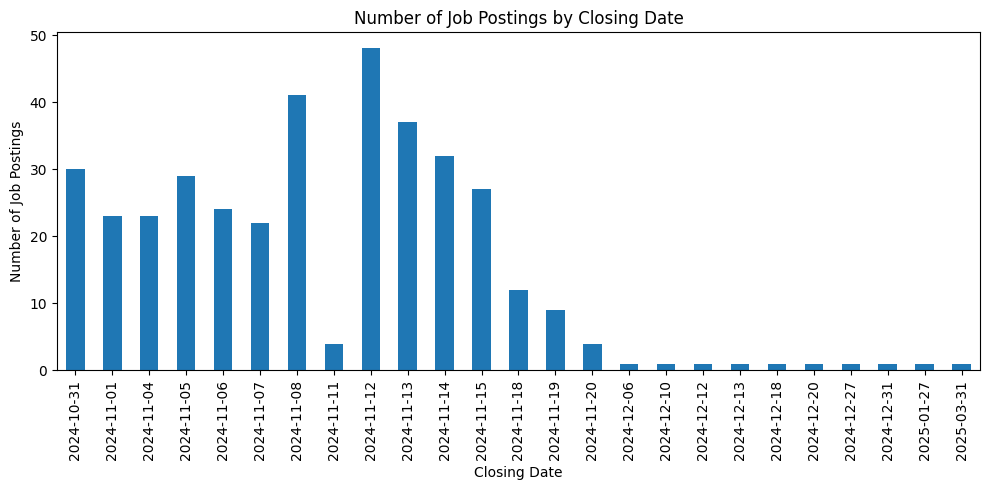

In [24]:
dfs['Count'] = 1
jobs_per_day = dfs.groupby(dfs['Closing Date'].dt.date)['Count'].sum()

plt.figure(figsize=(10, 5))
jobs_per_day.plot(kind='bar')
plt.title('Number of Job Postings by Closing Date')
plt.xlabel('Closing Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.tight_layout()

C:\Users\Peter\AppData\Local\Temp\ipykernel_3824\621846997.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


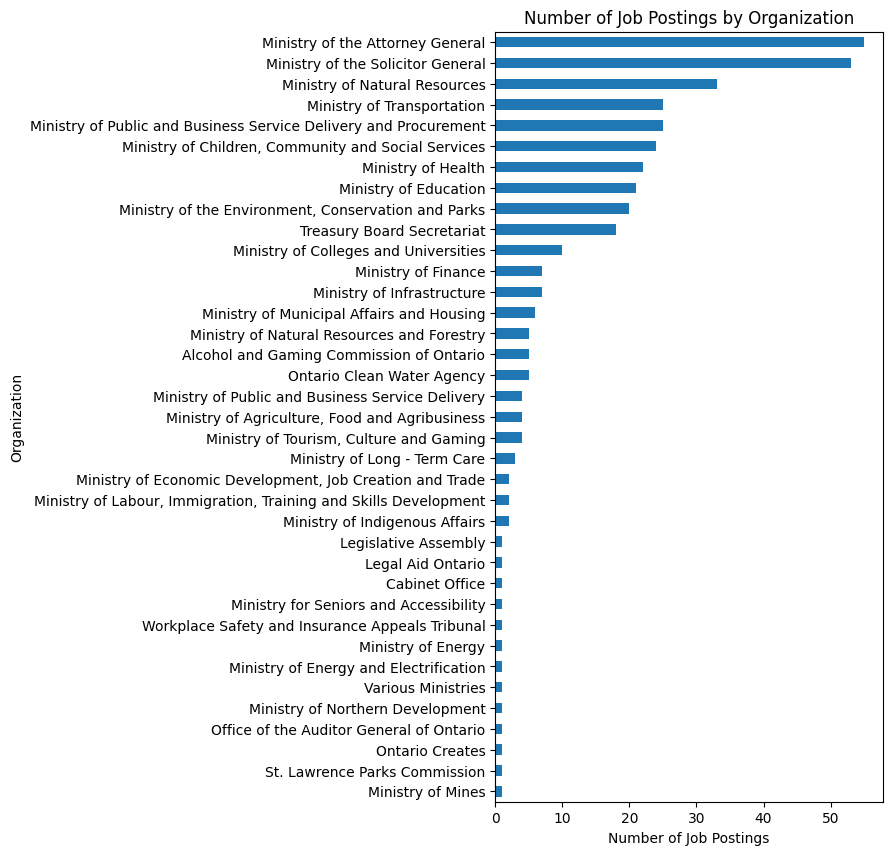

In [25]:
# Grouping by Organization and summing the counts
jobs_per_org = dfs.groupby(dfs['Organization'])['Count'].sum().sort_values(ascending=True)

# Plotting a horizontal bar chart
plt.figure(figsize=(5, 10))
jobs_per_org.plot(kind='barh')  # Changed to 'barh' for horizontal bars
plt.title('Number of Job Postings by Organization')
plt.xlabel('Number of Job Postings')  # X-axis now represents counts
plt.ylabel('Organization')  # Y-axis now represents organizations
plt.tight_layout()
plt.show()


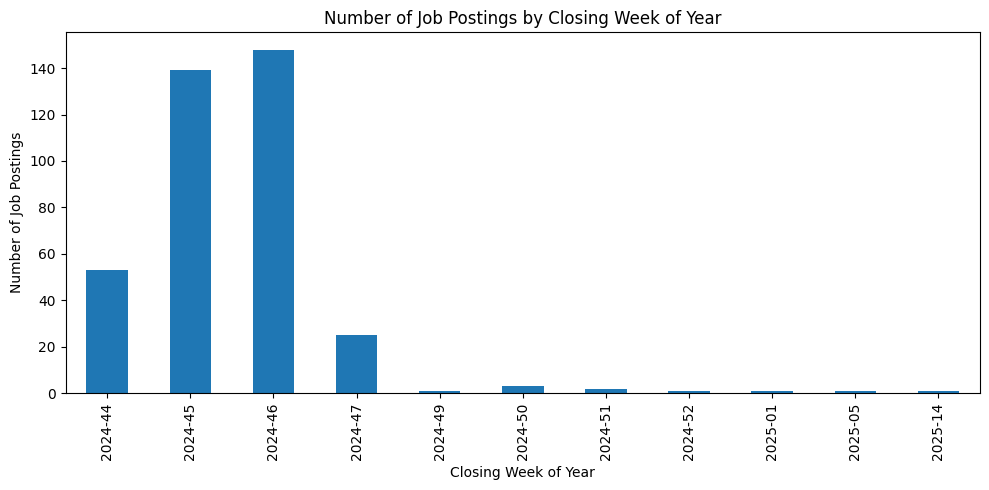

In [26]:
dfs['Count'] = 1
jobs_per_week_of_year = dfs.groupby(dfs['Closing Week'])['Count'].sum()

plt.figure(figsize=(10, 5))
jobs_per_week_of_year.plot(kind='bar')
plt.title('Number of Job Postings by Closing Week of Year')
plt.xlabel('Closing Week of Year')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.tight_layout()

In [27]:
dfs

Job ID                                          Job Title  \
0    220114           Amended - Consumer Information Clerk (1)   
1    218648                Amended - Service Planning Lead (2)   
2    220626  Assistant Provincial Central Ambulance Communi...   
3    220782              Business and Fiscal Planning Lead (3)   
4    221301  Case Management Officer - 2 Unilingual (Englis...   
..      ...                                                ...   
370  222379  Court and Client Representative (temporary and...   
371  219108           Divisional Business Services Advisor (1)   
372  221896                         Educational Consultant (1)   
373  221375                       Food Services Supervisor (1)   
374  222390              Classroom Assistant Blind Program (1)   

                                          Organization  \
0    Ministry of Public and Business Service Delive...   
1    Ministry of Public and Business Service Delive...   
2                                   Ministry of Health   
3    Ministry of Children, Community and Social Ser...   
4    Ministry of Children, Community and Social Ser...   
..                                                 ...   
370                   Ministry of the Attorney General   
371  Ministry of the Environment, Conservation and ...   
372                  Ministry of the Solicitor General   
373                  Ministry of the Solicitor General   
374                              Ministry of Education   

                                 Salary                    Location  \
0             $26.92  - $31.31 Per Hour     Toronto, Toronto Region   
1    $82,217.00  - $121,155.00 Per Year     Toronto, Toronto Region   
2    $71,563.00  - $100,052.00 Per Year     Toronto, Toronto Region   
3    $82,217.00  - $121,155.00 Per Year     Toronto, Toronto Region   
4       $1,265.80  - $1,554.23 Per Week     Toronto, Toronto Region   
..                                  ...                         ...   
370           $29.53  - $34.75 Per Hour  Fort Frances, North Region   
371  $76,231.00  - $109,842.00 Per Year   Etobicoke, Toronto Region   
372  $76,231.00  - $109,842.00 Per Year     Toronto, Toronto Region   
373     $1,282.88  - $1,529.42 Per Week   Thunder Bay, North Region   
374           $24.61  - $27.14 Per Hour      Brantford, West Region   

           Closing Date                                     Position Title  \
0   2024-11-04 11:59:00               Amended - Consumer Information Clerk   
1   2024-11-05 11:59:00                    Amended - Service Planning Lead   
2   2024-11-04 11:59:00  Assistant Provincial Central Ambulance Communi...   
3   2024-11-04 11:59:00                  Business and Fiscal Planning Lead   
4   2024-11-04 11:59:00  Case Management Officer - 2 Unilingual (Englis...   
..                  ...                                                ...   
370 2024-11-13 11:59:00  Court and Client Representative (temporary and...   
371 2024-11-13 11:59:00               Divisional Business Services Advisor   
372 2024-11-13 11:59:00                             Educational Consultant   
373 2024-11-15 11:59:00                           Food Services Supervisor   
374 2024-11-15 11:59:00                  Classroom Assistant Blind Program   

                                       Job Description  \
0    AMENDMENT: The duration of this assignment has...   
1    Amendment: this job posting has been amended t...   
2    Consider this exciting opportunity with the Em...   
3    Are you looking for an opportunity to highligh...   
4    Join the Family Responsibility Office (FRO) Te...   
..                                                 ...   
370  Are you interested in launching your career in...   
371  Are you an effective multi-tasker with excelle...   
372  Do you possess adult education experience coup...   
373  Bring your culinary expertise and leadership s...   
374  Job ID: 222390 (Competition #PDSB24-182)\nThe ...   

                            

In [ ]:
    csv_files = sorted([f for f in os.listdir() if f.startswith('job_listings_')])
    latest_file = csv_files[-1] if csv_files else None

    if latest_file:
        df = pd.read_csv(latest_file)
        df['date_posted'] = pd.to_datetime(df['date_posted'])

        df['count'] = 1
        jobs_per_day = df.groupby(df['date_posted'].dt.date)['count'].sum()

        plt.figure(figsize=(10, 5))
        jobs_per_day.plot(kind='bar')
        plt.title('Number of Job Postings by Date')
        plt.xlabel('Date')
        plt.ylabel('Number of Job Postings')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.savefig('docs/job_postings_visualization.png')  # Save in docs directory
        plt.show()